# Plot metric rank distributions per output

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
files = !ls ../../Paper/202109_kBET_fix/Supplementary\ Files/Results/*.csv

In [3]:
files

['../../Paper/202109_kBET_fix/Supplementary Files/Results/immune_cell_hum_mou_summary_scores.csv',
 '../../Paper/202109_kBET_fix/Supplementary Files/Results/immune_cell_hum_summary_scores.csv',
 '../../Paper/202109_kBET_fix/Supplementary Files/Results/lung_atlas_summary_scores.csv',
 '../../Paper/202109_kBET_fix/Supplementary Files/Results/mouse_brain_summary_scores.csv',
 '../../Paper/202109_kBET_fix/Supplementary Files/Results/pancreas_summary_scores.csv',
 '../../Paper/202109_kBET_fix/Supplementary Files/Results/simulations_1_1_summary_scores.csv',
 '../../Paper/202109_kBET_fix/Supplementary Files/Results/simulations_2_summary_scores.csv']

In [4]:
data = dict()

for f in files:
    key = f.split('/')[-1].split('_summary_')[0]
    data[key] = pd.read_csv(f, index_col=0)

## Functions to clean the code`

In [5]:
def clean_df(df):
    df = df[df['Overall Score'].notna()]
    return df

def rank_df(df):
    df_obj = df[df.columns[df.dtypes != float]]
    df_rank = df.rank(ascending=False, numeric_only=True)
    
    df_new = pd.concat([df_obj, df_rank], axis=1)
    
    return df_new

def method_index(df):
    # turns the index into a more meaningful representation
    df.index = ['_'.join(df[df.columns[df.dtypes != float]].iloc[i])
                    for i in range(df.shape[0])]
    


## Plots

In [6]:
def plot_ranks_basic(df, filename=None, **kwds):
    df_new = rank_df(clean_df(df))

    method_index(df_new)

    df_new = df_new.drop(columns=['Overall Score', 'Batch Correction', 'Bio conservation'])
    df_new = df_new[df_new.columns[df_new.dtypes == float]]
    
    # Format x-axis labels
    tmp = df_new.index.tolist()
    new_idx = list()
    for idx in tmp:
        idx_list = idx.split('_')
        suffix = '('+'/'.join(idx_list[-2:])+')'
        prefix = ' '.join(idx_list[:-2])
        new_idx.append(prefix+' '+suffix)
    df_new.index = new_idx
    
    p1 = df_new.T.plot(kind='box', figsize=(25,8))
    plt.xticks(rotation=90);
    
    plt.ylabel('Metric rank')
    plt.xlabel('Method run')

    if filename is not None:
        plt.savefig(filename, **kwds)
    else:
        plt.show()

In [7]:
def plot_ranks_sns(df, filename=None, **kwds):
    df_new = rank_df(clean_df(df))

    method_index(df_new)

    df_new = df_new.drop(columns=['Overall Score', 'Batch Correction', 'Bio conservation'])
    df_new = df_new[df_new.columns[df_new.dtypes == float]]
    
    # Format x-axis labels
    tmp = df_new.index.tolist()
    new_idx = list()
    for idx in tmp:
        idx_list = idx.split('_')
        suffix = '('+'/'.join(idx_list[-2:])+')'
        prefix = ' '.join(idx_list[:-2])
        new_idx.append(prefix+' '+suffix)
    df_new.index = new_idx
    
    df_new['method'] = new_idx
    
    df_plot = pd.melt(df_new, id_vars=['method'], value_vars=df_new.columns.drop('method'))
    
    sns.set(style="whitegrid")

    fig, ax = plt.subplots(figsize=(25,8))
    ax = sns.boxplot(x="method", y="value", data=df_plot, showfliers = False)
    ax = sns.swarmplot(x="method", y="value", data=df_plot, color=".25")

    #fontsize
    ax.set_xlabel("X Label",fontsize=30)
    ax.set_ylabel("Y Label",fontsize=30)
    ax.tick_params(labelsize=17)    
    
    plt.xticks(rotation=90);
    
    plt.ylabel('Metric ranks')
    plt.xlabel('Method output')

    if filename is not None:
        plt.savefig(filename, bbox_inches='tight', **kwds)
        plt.show()
    else:
        plt.show()

Task: immune_cell_hum_mou


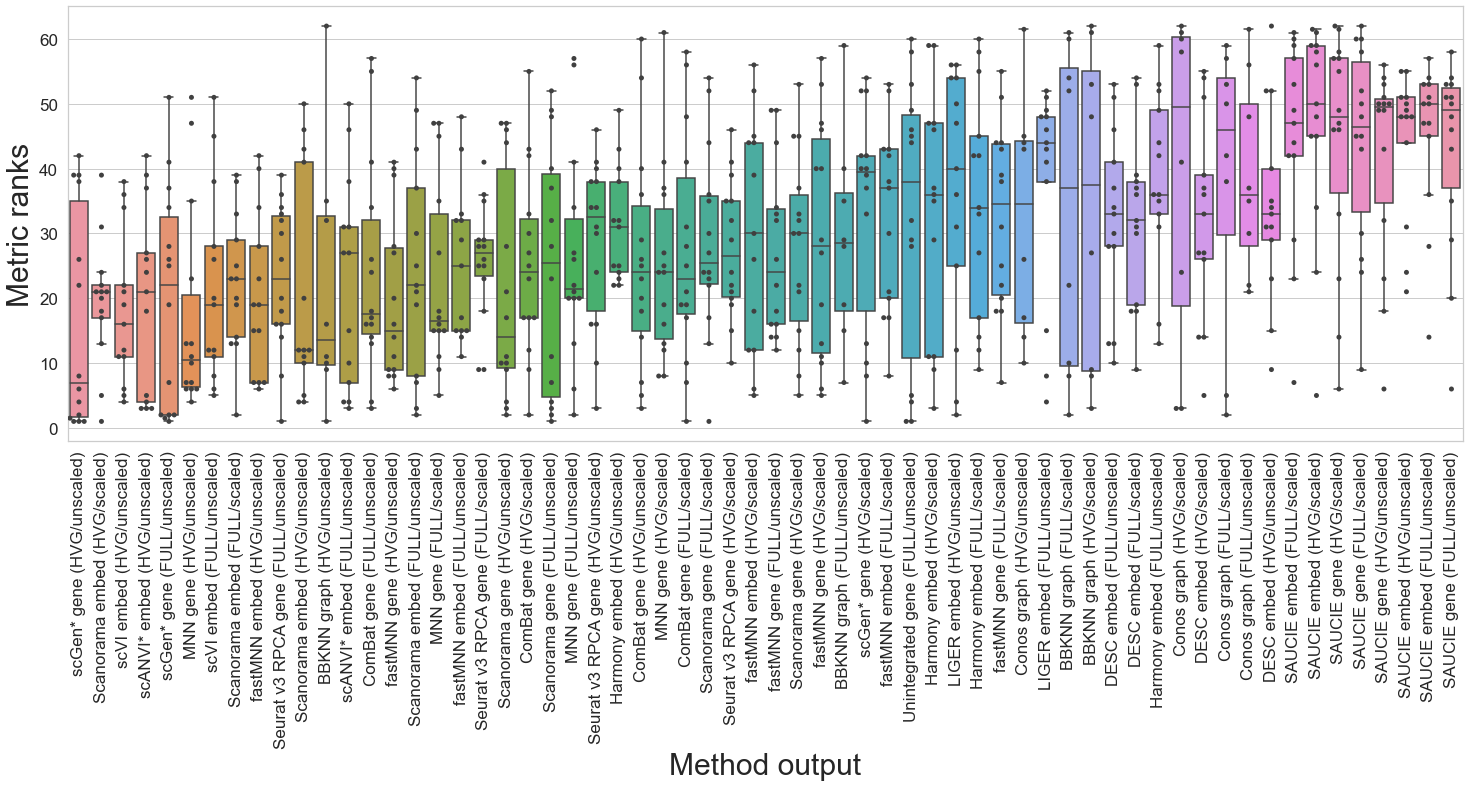


Task: immune_cell_hum


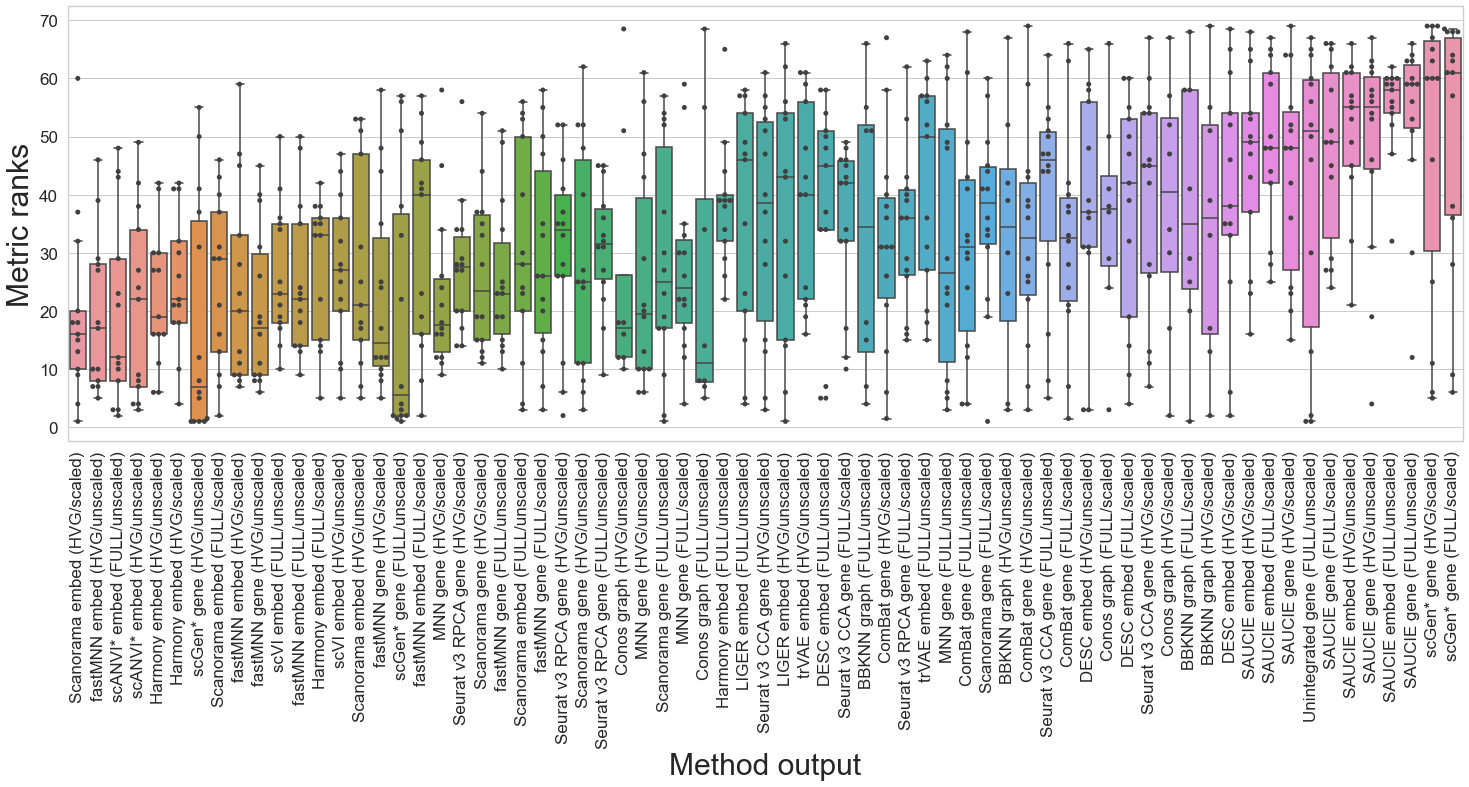


Task: lung_atlas


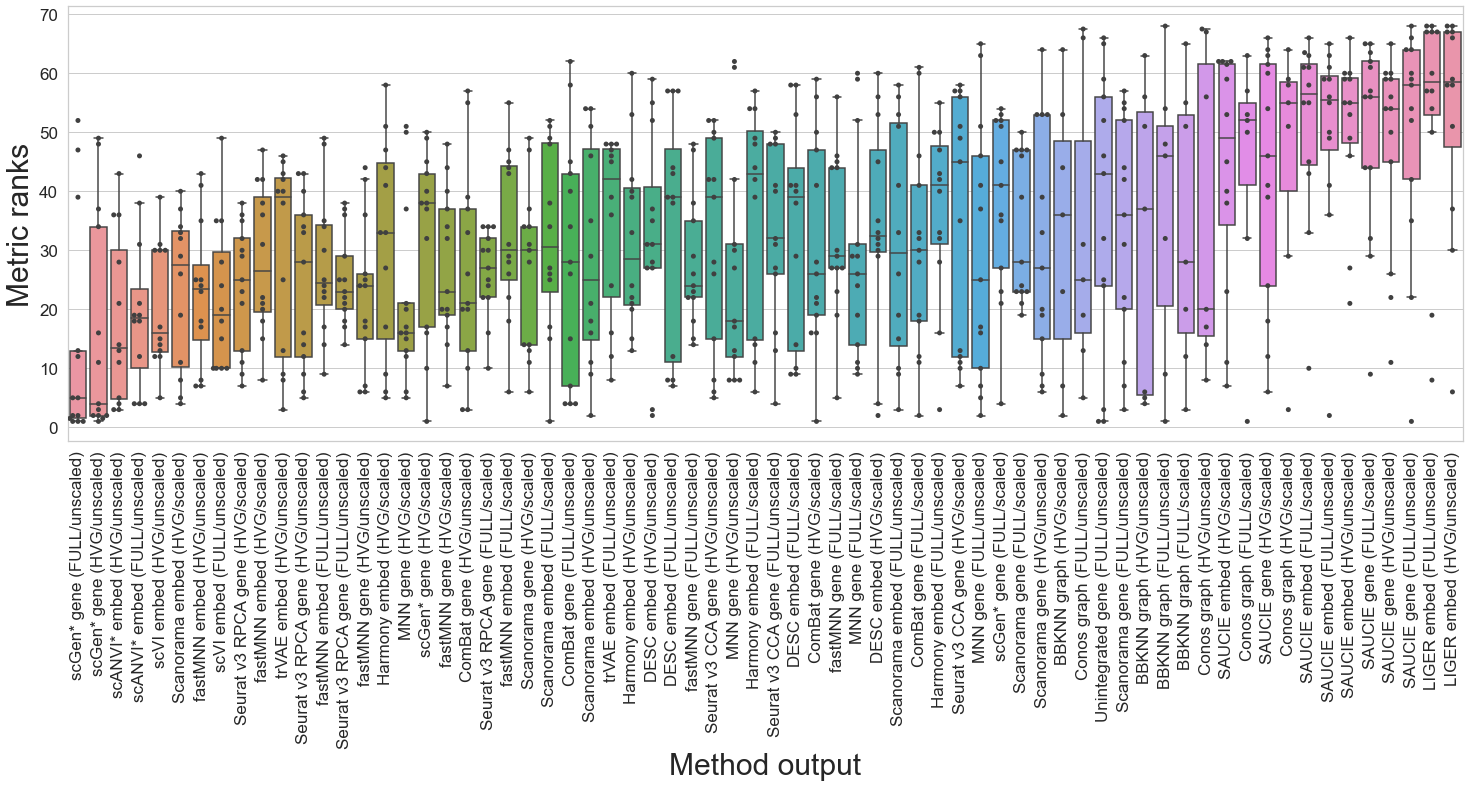


Task: mouse_brain


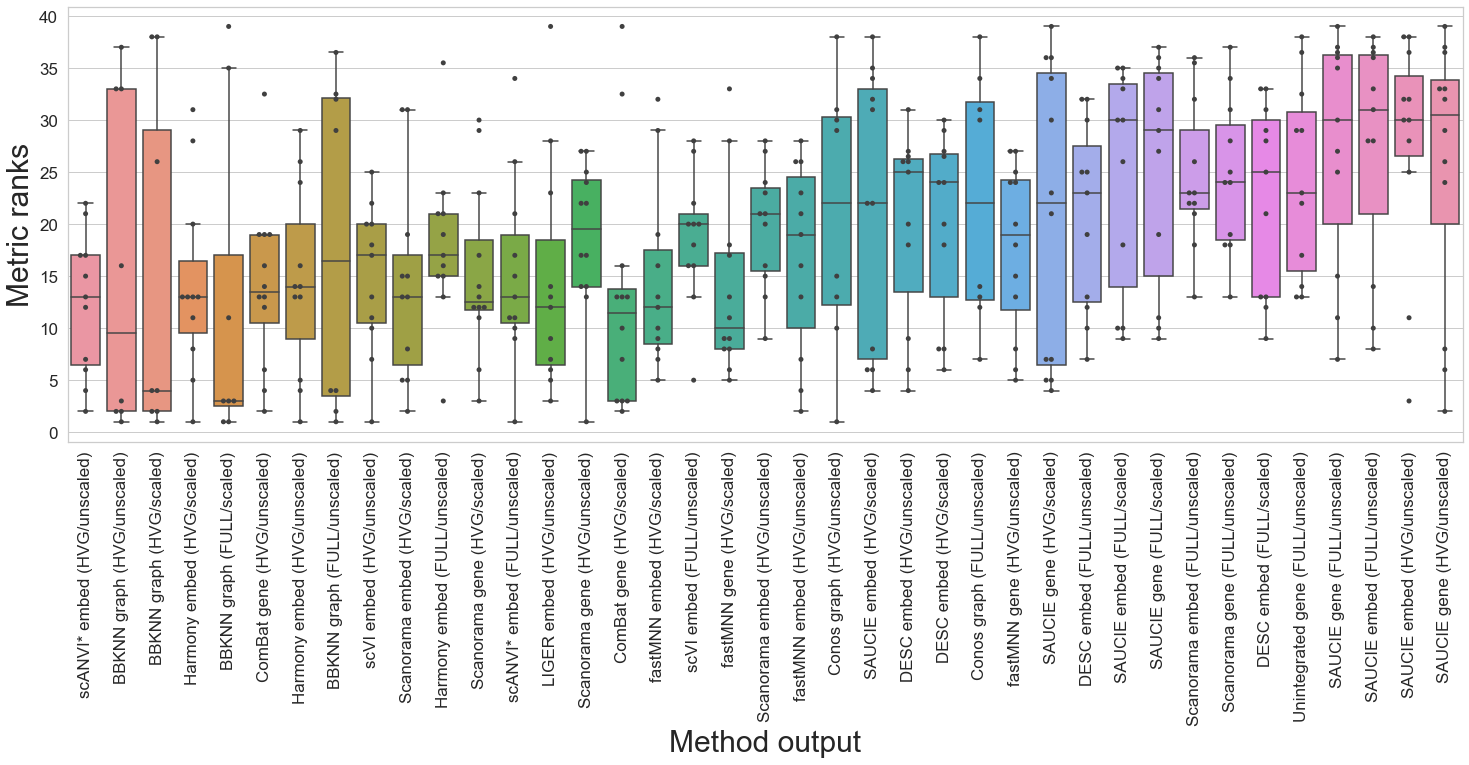


Task: pancreas


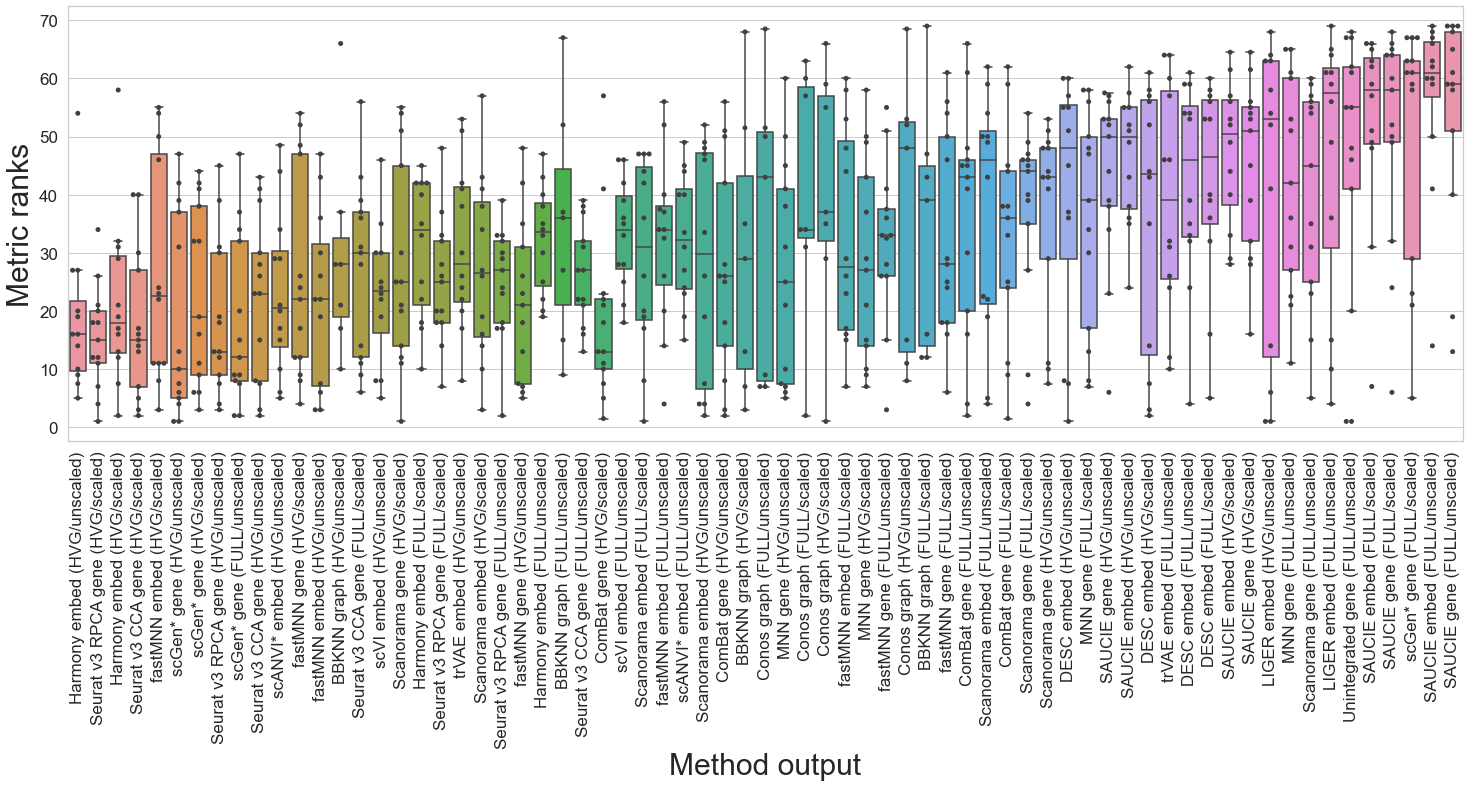


Task: simulations_1_1


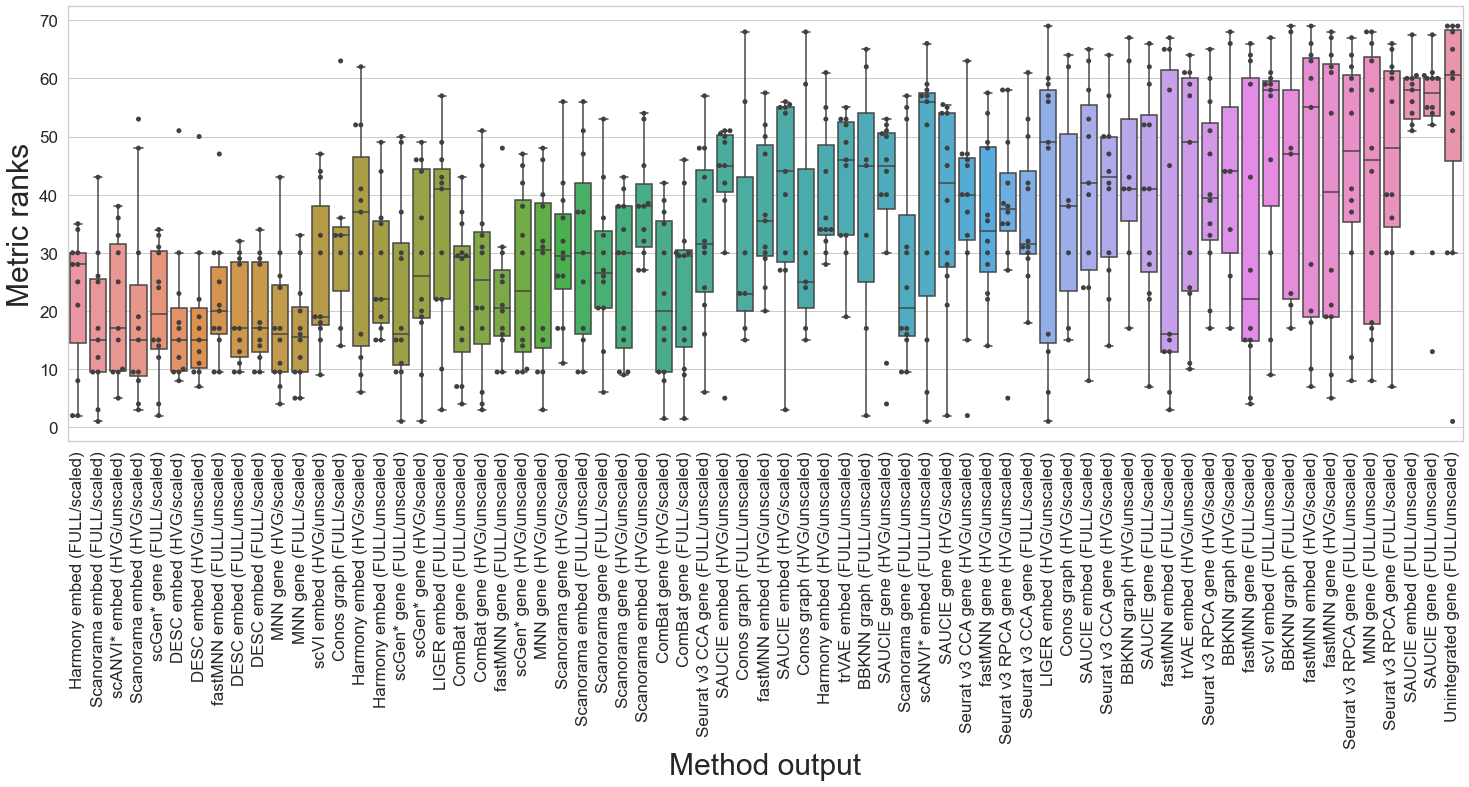


Task: simulations_2


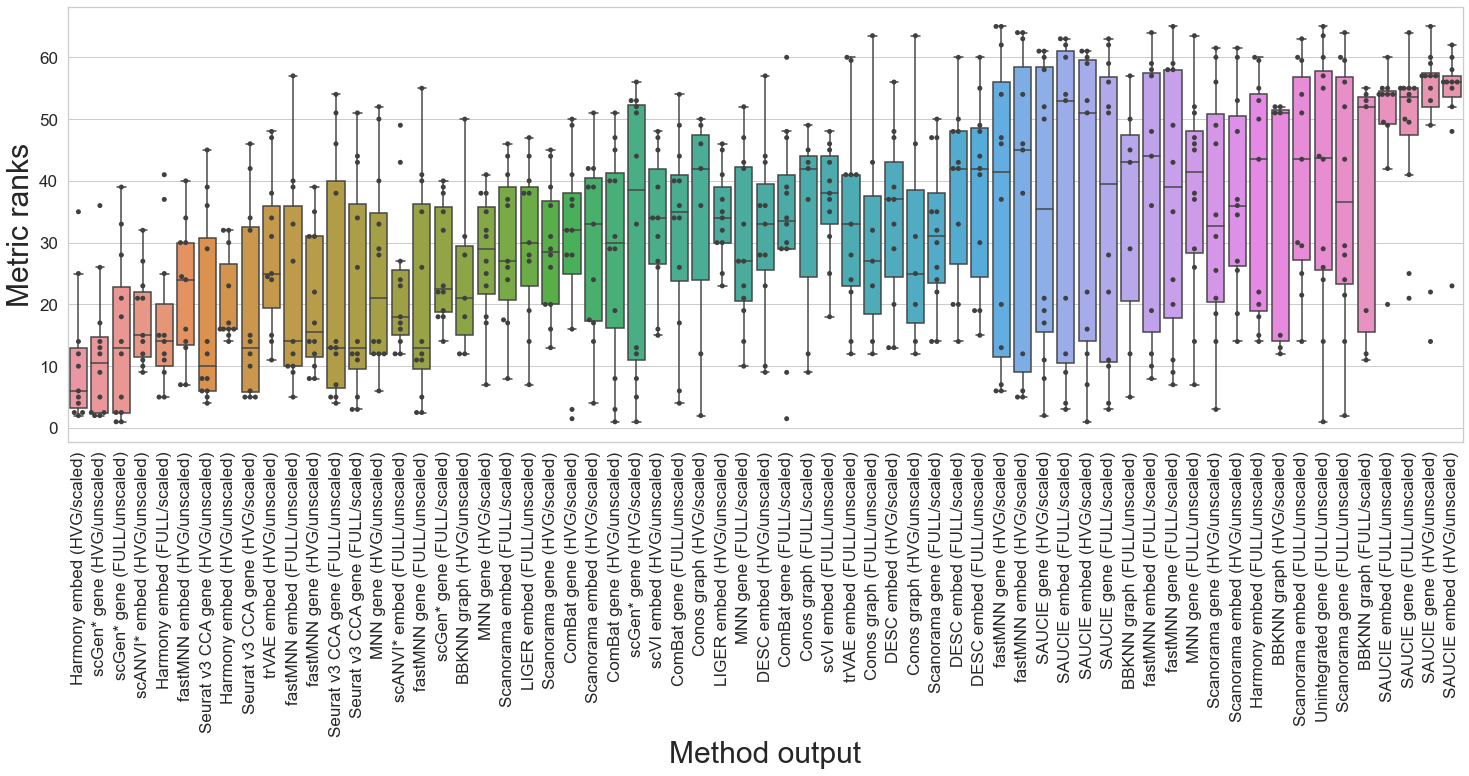

In [8]:
for task in data.keys():
    print(f'Task: {task}')
    plot_ranks_sns(data[task], filename='metric_ranks_'+task+'.jpg')
    print('')

## ATAC figures

In [9]:
files = ['../../Paper/202109_kBET_fix/Supplementary Files/Results/ATAC/mouse_brain_atac_large_summary_scores.csv', '../../Paper/202109_kBET_fix/Supplementary Files/Results/ATAC/mouse_brain_atac_small_summary_scores.csv']


In [10]:
files

['../../Paper/202109_kBET_fix/Supplementary Files/Results/ATAC/mouse_brain_atac_large_summary_scores.csv',
 '../../Paper/202109_kBET_fix/Supplementary Files/Results/ATAC/mouse_brain_atac_small_summary_scores.csv']

In [11]:
data = dict()

for f in files:
    key = f.split('/')[-1].split('_summary_')[0]
    data[key] = pd.read_csv(f, index_col=0)

Task: mouse_brain_atac_large


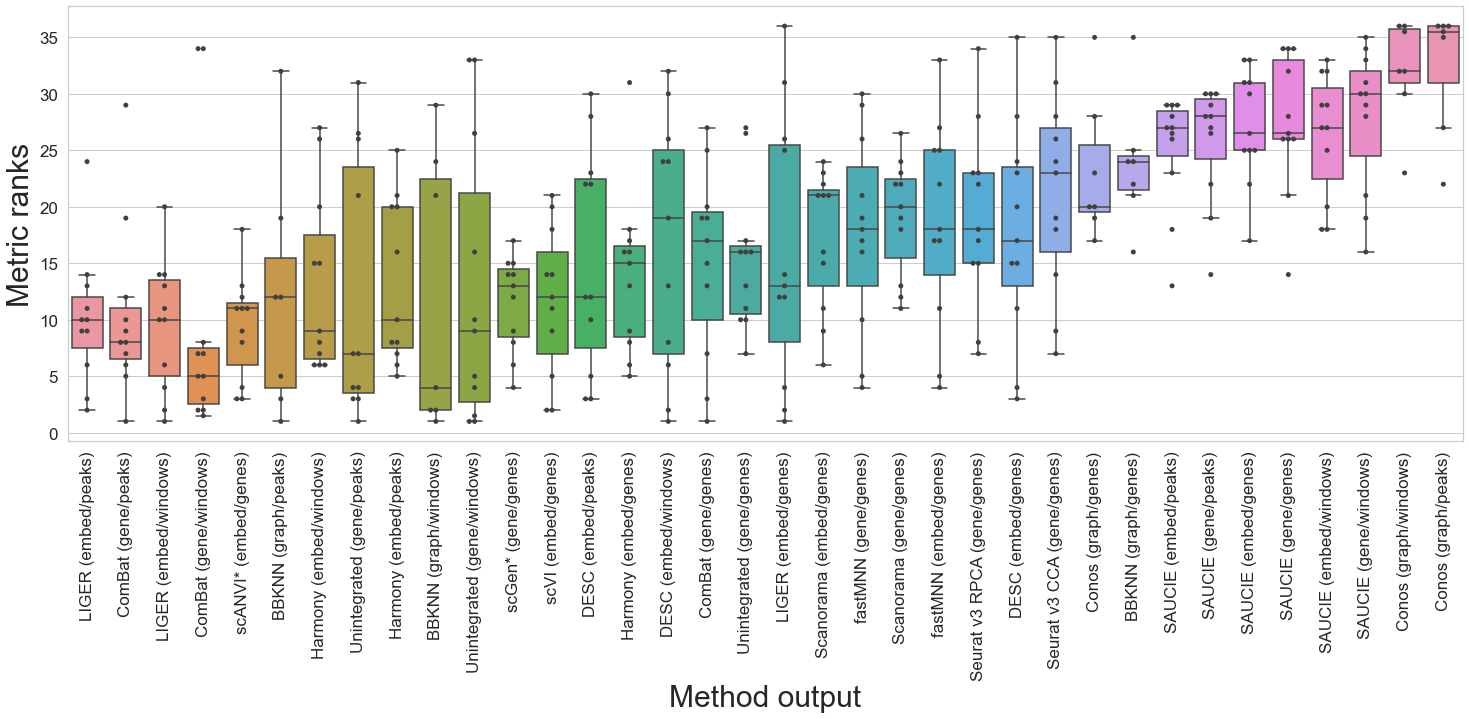


Task: mouse_brain_atac_small


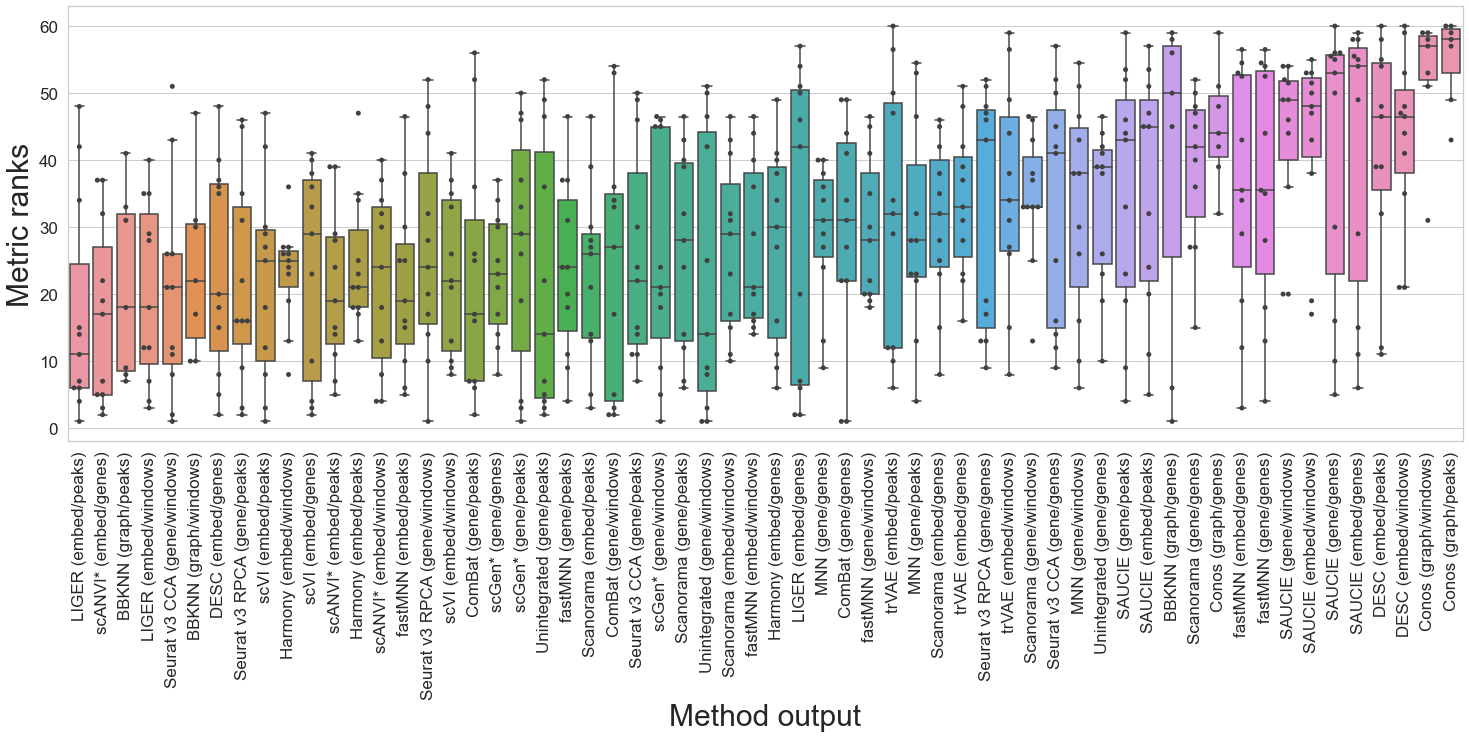

In [12]:
for task in data.keys():
    print(f'Task: {task}')
    plot_ranks_sns(data[task], filename='metric_ranks_'+task+'.jpg')
    print('')